### Create my Own data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

create a dataset with different number of sample and density

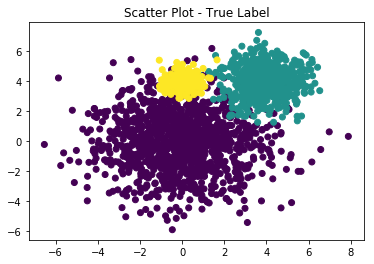

In [30]:
D = 2
s = 4
mu1 = np.array([0,0])
mu2 = np.array([s, s])
mu3 = np.array([0,s])

N = 2000
X = np.zeros((N,D))
X[:1200,:] = np.random.randn(1200,D)*2 + mu1 
X[1200:1800,:] = np.random.randn(600,D) + mu2
X[1800:,:] = np.random.randn(200,D)*0.5 + mu3
#label different cluster
Y = np.zeros(N)
Y[:1200] = 0
Y[1200:1800] = 1
Y[1800:]= 2
plt.scatter(X[:,0], X[:,1], c = Y)
plt.title('Scatter Plot - True Label')
plt.show()

### KMeans

In [32]:
from sklearn.cluster import KMeans

num_clusters = 3

# number of clusters
km = KMeans(n_clusters=num_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

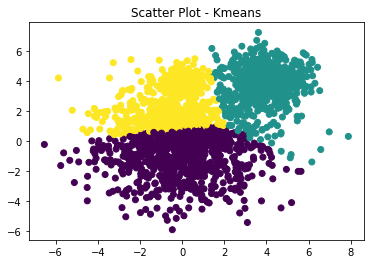

In [33]:
plt.scatter(X[:,0], X[:,1], c = km.labels_)
plt.title('Scatter Plot - Kmeans')
plt.show()

In [23]:
def gmm(X, K, max_iter = 20):
    N, D = X.shape 
    R = np.zeros((N,K))
    M = np.zeros((K,D))
    C = np.zeros((K,D,D))
    pi = np.ones(K)/K
    
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.diag(np.ones(D))
        
    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((N, K))
    for i in range(max_iter):
        #step1: compute responsibility
        for k in range(K):
            for n in range(N):
                weighted_pdfs[n,k] = pi[k]* multivariate_normal.pdf(X[n], M[k], C[k]) 
                
        for k in range(K):
            for n in range(N):
                R[n,k] = weighted_pdfs[n,k] / weighted_pdfs[n,:].sum()
        #step2: update parameters    
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk/N
            M[k] = R[:,k].dot(X)/Nk
            delta = X - M[k]
            Rdelta = np.expand_dims(R[:,k],-1) * delta
            C[k] = Rdelta.T.dot(delta) / Nk + np.eye(D)*0.01
            
        costs[i] = np.log(weighted_pdfs.sum(axis = 1)).sum()
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break
            
    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    return R

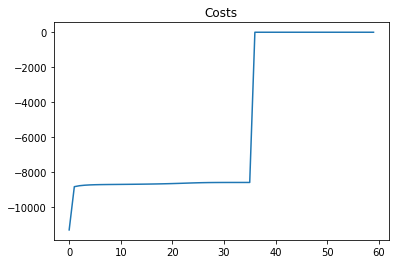

In [36]:
R = gmm(X, K = 3, max_iter = 60)

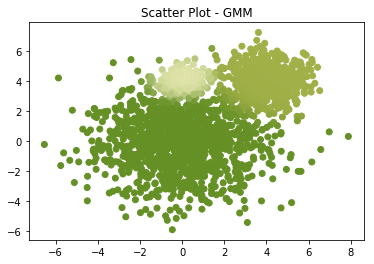

In [37]:
K = 3
random_color = np.random.random((K,3))
        #result is N by 3
colors = R.dot(random_color)
plt.scatter(X[:,0], X[:,1], c = colors)
plt.title('Scatter Plot - GMM')
plt.show()

###### GMM is able to identify relatively small colusters while Kmeans tend to assume each cluster with same size